# TME Robotique et apprentissage: evolution de structures


* Étudiant: Nom: Fu Prénom: Vincent
* Si binome: Nom: Liu Prénom: Yuhao

Merci à chaque membre du binome de soumettre en son nom sous moodle, cela facilite le suivi.

## Introduction

Ce TME est composé de deux parties indépendantes qui s'appuieront toutes deux sur le framework DEAP que vous avez utilisé lors du dernier TME. 

Dans la première partie, vous ferez de la regression symbolique avec de la programmation génétique.

Dans la seconde partie, vous testerez l'expérience de Lehman et Stanley sur novelty search. 

Des squelettes de code vous sont fournis. Les zones à compléter sont repérées par des '##'.

Merci de soumettre le code complété ainsi que le notebook auquel vous aurez ajouté les commentaires et tracés de courbes nécessaires pour répondre aux questions. MERCI DE NE PAS SOUMETTRE VOS FICHIERS DE DONNEES. La soumission se fait directement sur moodle.

## 1. Regression symbolique

Vous allez utiliser la programmation génétique pour retrouver des équations à partir de données. 
Vous utiliserez pour cela les fonctions proposées par DEAP:
https://deap.readthedocs.io/en/master/tutorials/advanced/gp.html


**1.1-** Complétez le code qui vous a été fourni `symbolic_regression.py`. En vous appuyant sur DEAP, vous implémenterez 3 stratégies: 
* une stratégie purement élitiste visant à minimiser l'erreur d'approximation uniquement, 
* la stratégie avec double tournoi, le premier tournoi choisissant les individus avec les erreurs les plus faibles et le second tournoi choisissant les individus avec le modèle le plus simple
* une stratégie multi-objectif s'appuyant sur NSGA-2 avec l'erreur d'approximation comme premier objectif et la taille du modèle en deuxième objectif (les deux étant à minimiser)

Vous testerez votre code sur 2 fonctions simples (par exemple f(x,y)=x*y+cos(x) et f(x,y,z)=x^2+y^2+z^2) avec le jeu de fonctions primitives suivant: +, -, *, / (protected_div), cos et sin. Vous pourrez ajouter une constante (1) et une constante éphémère (variable aléatoire uniforme entre -1 et 1). Vous génèrerez un ensemble de données d'entrainement et un ensemble que vous utiliserez pour vérifier s'il y a eu surapprentissage. Vous pourrez générer, par exemple, 30 valeurs différentes de x et 30 valeurs différentes de y. Vous indiquerez dans votre réponse les opérateurs de mutation et de croisement que vous avez utilisé (remarque: si vous voulez combiner plusieurs opérateurs de mutation ou de croisement, il faut définir un nouvel opérateur qui gère cette combinaison).


Vous regarderez les arbres générés et indiquerez le nombre de fois que la fonction a été retrouvée sur une dizaine d'expériences. Vous comparerez la taille des fonctions générées selon la variante de sélection utilisée. 

Remarque1: pour rappel, la programmation génétique utilise généralement de grandes populations. Il vous est recommandé d'utiliser des tailles de 400 minimum. En une centaine de générations, vous devriez pouvoir observer de premiers résultats. 

Remarque2: pour limiter l'impact du "bloat", il vous est recommandé de mettre une taille maximale à l'arbre généré par les opérateurs de mutation et de croisement. Vous pourrez utiliser gp.staticLimit. Sans cela, certaines expériences risquent de prendre un temps et une mémoire considérables. 

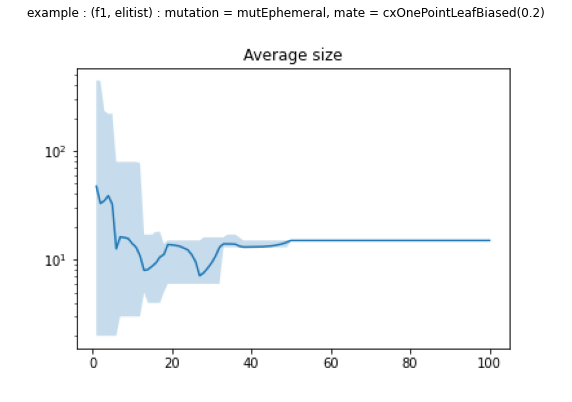

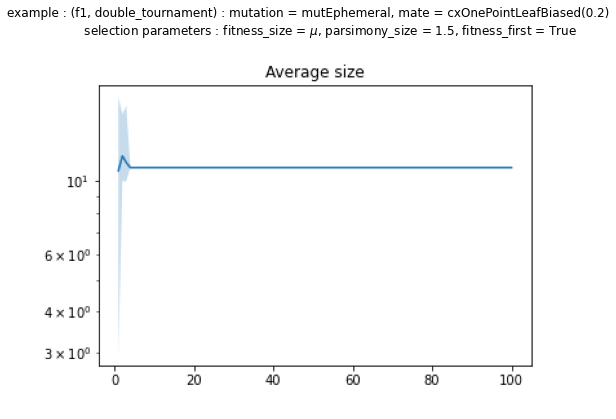

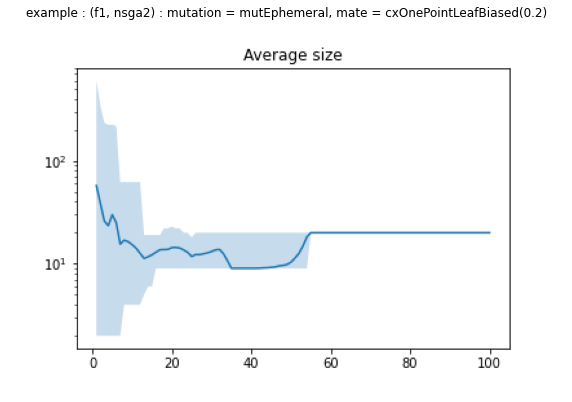

In [34]:
import matplotlib.pyplot as plt
from PIL import Image

res = Image.open("f1_elitist/res_res_2021_04_21-11-53-18/avg_size_gen100.png")
plt.figure(figsize=(10,10))
plt.title("example : (f1, elitist) : mutation = mutEphemeral, mate = cxOnePointLeafBiased(0.2)")
plt.axis('off')
plt.imshow(res)

res = Image.open("f1_double_tournament/res_res_2021_04_21-12-07-26/avg_size_gen100.png")
plt.figure(figsize=(10,10))
plt.title("example : (f1, double_tournament) : mutation = mutEphemeral, mate = cxOnePointLeafBiased(0.2)\n \
           selection parameters : fitness_size = $\mu$, parsimony_size = 1.5, fitness_first = True ")
plt.axis('off')
plt.imshow(res)

res = Image.open("f1_nsga2/res_res_2021_04_21-12-27-24/avg_size_gen100.png")
plt.figure(figsize=(10,10))
plt.title("example : (f1, nsga2) : mutation = mutEphemeral, mate = cxOnePointLeafBiased(0.2)")
plt.axis('off')
plt.imshow(res)

Nous avons choisi la mutation mutEphemeral ainsi que le croissement cxOnePointLeafBiased avec termpb = 0.2.

Sur 20 appels (f1, elitist), nous avons obtenu 4 arbres ayant des erreurs inférieures à $10^{-5}$ dont 3 qui correspondent exactement à la fonction recherchée (arbre de taille 6 pour f1). Nous avons obtenu une taille moyenne de 24 noeuds dans le cas d'une sélection élitiste.

Sur 20 appels (f1, double_tournament), nous avons obtenu 1 arbre ayant une erreur inférieure à $10^{-5}$ dont 1 qui correspond exactement à la fonction recherchée (arbre de taille 6 pour f1). Nous avons obtenu une taille moyenne de 14 noeuds dans le cas d'une sélection à double tournois.

Sur 20 appels (f1, nsga2), nous avons obtenu 18 arbres ayant des erreurs inférieures à $10^{-5}$ dont 2 qui correspondent exactement à la fonction recherchée (arbre de taille 6 pour f1). Nous avons obtenu une taille moyenne de 22 noeuds dans le cas d'une sélection nsga2.  

On remarque qu'avec une sélection élitiste, on a plus de chance d'obtenir la fonction recherchée qu'avec une sélection à double tournois. Cependant, la taille moyenne des noeuds est plus élevée avec une sélection élitiste qu'avec une sélection à double tournois.   
Enfin, la sélection nsga2 est une mixte des deux : on a plus de chance d'obtenir la fonction recherchée (compararée avec double tournament) et avec une taille moyenne plus faible (comparée avec elitist) malgré le fait qu'il est facile d'obtenir des noeuds parasites avec nsga2.

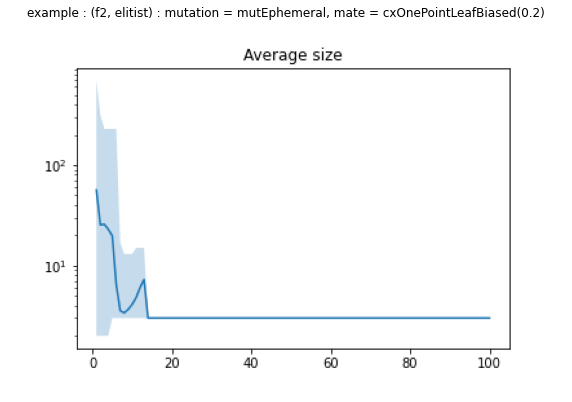

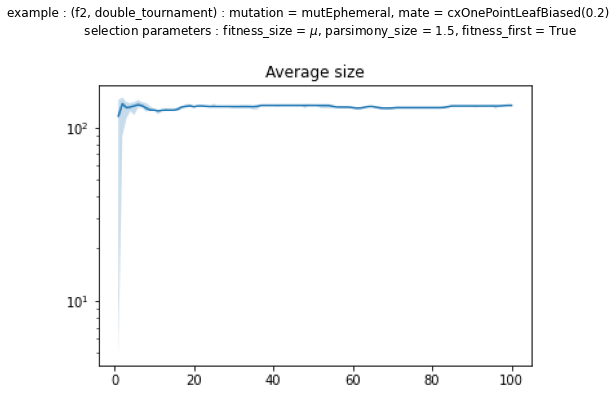

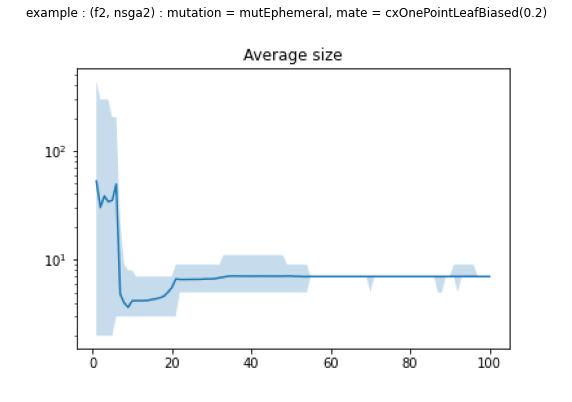

In [35]:
import matplotlib.pyplot as plt
from PIL import Image

res = Image.open("f2_elitist/res_res_2021_04_21-12-52-41/avg_size_gen100.png")
plt.figure(figsize=(10,10))
plt.title("example : (f2, elitist) : mutation = mutEphemeral, mate = cxOnePointLeafBiased(0.2)")
plt.axis('off')
plt.imshow(res)

res = Image.open("f2_double_tournament/res_res_2021_04_21-13-03-06/avg_size_gen100.png")
plt.figure(figsize=(10,10))
plt.title("example : (f2, double_tournament) : mutation = mutEphemeral, mate = cxOnePointLeafBiased(0.2)\n \
           selection parameters : fitness_size = $\mu$, parsimony_size = 1.5, fitness_first = True ")
plt.axis('off')
plt.imshow(res)

res = Image.open("f2_nsga2/res_res_2021_04_21-13-21-20/avg_size_gen100.png")
plt.figure(figsize=(10,10))
plt.title("example : (f2, nsga2) : mutation = mutEphemeral, mate = cxOnePointLeafBiased(0.2)")
plt.axis('off')
plt.imshow(res)

Sur 20 appels (f2, elitist), nous avons obtenu 0 arbres ayant des erreurs inférieures à $10^{-5}$ dont 0 qui correspondent exactement à la fonction recherchée (arbre de taille 11 pour f2). Nous avons obtenu une taille moyenne de 26 noeuds dans le cas d'une sélection élitiste.

Sur 20 appels (f2, double_tournament), nous avons obtenu 0 arbres ayant des erreurs inférieures à $10^{-5}$ dont 0 qui correspondent exactement à la fonction recherchée (arbre de taille 11 pour f2). Nous avons obtenu une taille moyenne de 14 noeuds dans le cas d'une sélection à double tournois.

Sur 20 appels (f2, nsga2), nous avons obtenu 3 arbres ayant des erreurs inférieures à $10^{-5}$ dont 1 qui correspondent exactement à la fonction recherchée (arbre de taille 6 pour f1). Nous avons obtenu une taille moyenne de 15 noeuds dans le cas d'une sélection nsga2.

**1.2-** Ajoutez du bruit à vos fonctions et observez le résultat obtenu (mettez des valeurs qui sont faibles devant les données, par exemple 0.0001).

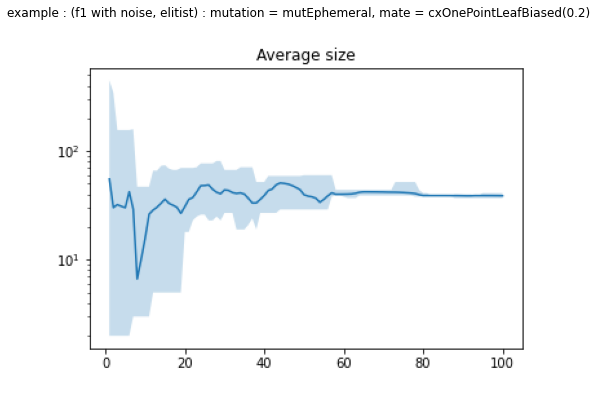

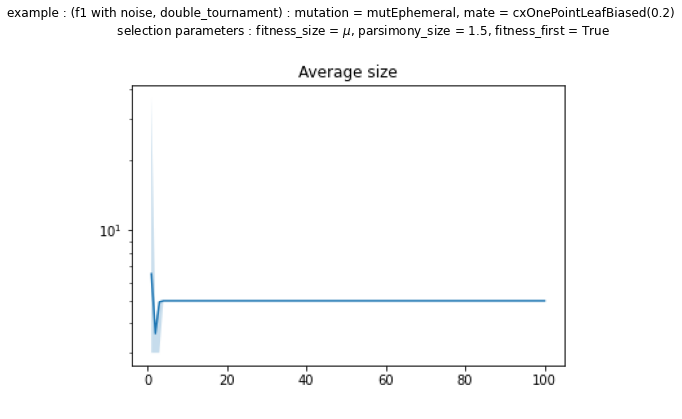

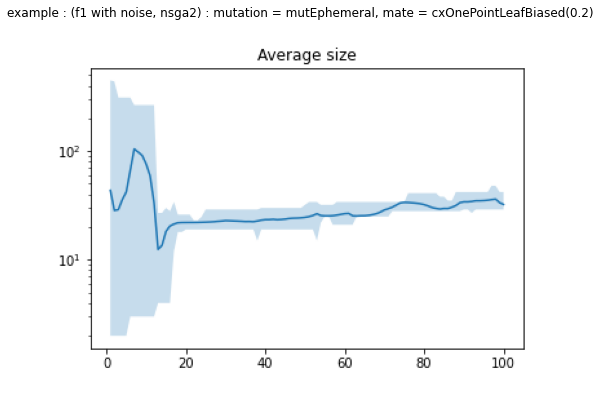

In [37]:
import matplotlib.pyplot as plt
from PIL import Image

res = Image.open("f1_elitist_noise/res_res_2021_04_21-14-46-19/avg_size_gen100.png")
plt.figure(figsize=(10,10))
plt.title("example : (f1 with noise, elitist) : mutation = mutEphemeral, mate = cxOnePointLeafBiased(0.2)")
plt.axis('off')
plt.imshow(res)

res = Image.open("f1_double_tournament_noise/res_res_2021_04_21-15-05-14/avg_size_gen100.png")
plt.figure(figsize=(10,10))
plt.title("example : (f1 with noise, double_tournament) : mutation = mutEphemeral, mate = cxOnePointLeafBiased(0.2)\n \
           selection parameters : fitness_size = $\mu$, parsimony_size = 1.5, fitness_first = True ")
plt.axis('off')
plt.imshow(res)

res = Image.open("f1_nsga2_noise/res_res_2021_04_21-15-11-01/avg_size_gen100.png")
plt.figure(figsize=(10,10))
plt.title("example : (f1 with noise, nsga2) : mutation = mutEphemeral, mate = cxOnePointLeafBiased(0.2)")
plt.axis('off')
plt.imshow(res)

Sur 20 appels (f1 with noise, elitist), nous avons obtenu 3 arbres ayant des erreurs inférieures à $10^{-5}$ dont 2 qui correspondent exactement à la fonction recherchée (arbre de taille 6 pour f1). Nous avons obtenu une taille moyenne de 28 noeuds dans le cas d'une sélection élitiste.

Sur 20 appels (f1 with noise, double_tournament), nous avons obtenu 1 arbre ayant une erreur inférieure à $10^{-5}$ dont 1 qui correspond exactement à la fonction recherchée (arbre de taille 6 pour f1). Nous avons obtenu une taille moyenne de 13 noeuds dans le cas d'une sélection à double tournois.

Sur 20 appels (f1 with noise, nsga2), nous avons obtenu 8 arbres ayant des erreurs inférieures à  $10^{−5}$ dont 4 qui correspondent exactement à la fonction recherchée (arbre de taille 6 pour f1). Nous avons obtenu une taille moyenne de 17 noeuds dans le cas d'une sélection à double tournois.

Nous observons qu'en général en ajoutant du bruit faible à nos fonctions, nous avons une taille moyenne légèrement plus grande.

**1.3- (option) ** Utilisez le code d'apprentissage du pendule vue lors de la séance précédente pour générer des données et essayez d'apprendre un modèle du pendule (un arbre par dimension de l'espace d'état).

**Pour aller plus loin (non demandé pour le TME)** pour apprendre des modèles en écartant les solutions triviales et en gérant mieux les constantes, vous pouvez regarder ce qui a été fait notamment dans les articles suivants:
* Schmidt, M., & Lipson, H. (2009). Distilling free-form natural laws from experimental data. science, 324(5923), 81-85.
* Derner, E., Kubalík, J., Ancona, N., & Babuška, R. (2019). Symbolic Regression for Constructing Analytic Models in Reinforcement Learning. arXiv preprint arXiv:1903.11483.

## 2. Fitness & Nouveauté

L'environnement `FastsimSimpleNavigation-v0` de gym_fastsim permet de lancer des expériences de navigation avec un robot à roues naviguant dans un labyrinthe. Vous allez dans cette partie reproduire les expériences de Lehman et Stanley sur la recherche de nouveauté. Vous allez faire différentes variantes de cette expérience, certaines étant en mono- d'autres étant en multi-objectif. Pour simplifier, dans tous les cas, vous utiliserez NSGA-2, qui est équivalent à une stratégie élitiste en mono-objectif.

Pour utiliser l'environnement `FastsimSimpleNavigation-v0`, un script d'installation (linux) vous est fourni: `install-dependencies.sh`.


**2.1-**  Lancer une première expérience dans laquelle le robot doit atteindre la sortie du labyrinthe. Vous pourrez essayer avec la reward de l'expérience, qui est une reward binaire (sortie atteinte ou non) et avec une fitness plus continue dans laquelle la récompense est la distance à la sortie (à minimiser donc). Pour observer le comportement de la recherche effectuée, vous pourrez écrire la position du robot à la fin de l'évaluation et ensuite tracer ces positions avec les fonctions fournies dans `maze_plot.py` (vous pouvez aussi tracer les trajectoires, mais comme il y a 2000 positions par évaluation, dans ce cas, vous pourrez n'écrire qu'une position sur 100, par exemple).

Quelles parties de l'espace ont été explorées dans les deux cas ? Est-ce que la sortie est atteinte (vous vous limiterez à 200 générations) ? Si oui, au bout de combien de générations ?

**2.2-** Lancer la même expérience, mais avec un critère de nouveauté. Vous pourrez pour cela partir du code fourni pour le calcul de nouveauté (`novelty_search.py`) et le compléter.  

**2.3-** Utiliser en même temps la fitness et le critère de nouveauté avec NSGA-2. Mesurez le temps moyen pour atteindre la sortie. 